# NBA Tournament


## Table of Contents
- Introduction
- Data: Collection, Cleaning and Preprocessing
- Exploratory Data Anaylsis and Stats
- Model Creation
- NBA Tournament
- Conclusion

### Introduction

This project stems from a [ proposed project ] developed for a Machine Learning course, using Supervised Learning. I will attempt to gain better results and try out different models to establish a well defined tournament.
Previously, I used features intented to aid in winning a game such as Block, Steal, Rebound, etc. Logistic and linear regression were the only models used to make these winning prediction. <br/>
For this project, I will add more features and experiment with more regression models while using a more and advanced data to create an efficient model to predict the winner of team match ups, using data extracted from [NBA Site](https://www.nba.com)

<font color=red>Note:</font> [Selenium](https://selenium-python.readthedocs.io/installation.html) was used to retreive the source data. <br/>
This notebook contains interactive graphs which may require you to install a few dependencies. Graph images are displayed below the respected cell to view without running the program.

### Data 

#### Collection
 Below is the Selenium code used to retreive the our listings
Here we are going to extract the basketball seasons from the [NBA Site](https://www.nba.com/stats/teams/boxscores-traditional)

In [1]:
# Importing all neccesary packages
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import pandas as pd
from openpyxl import Workbook, load_workbook
from buckets import dimes

In [2]:
import time

In [3]:
# Webdriver: Chrome | Site: NBA site

driver = webdriver.Chrome()
driver.fullscreen_window()
url = "https://www.nba.com/stats/teams/boxscores-traditional"
driver.get(url)
driver.implicitly_wait(120)


In [4]:
# Create an Excel to begin data transfer
wb = Workbook()
wb.save('nba_box_scores.xlsx')
ws = wb.active
dfs = []

In [5]:
# Dictionary created from NBA Glossary
driver.execute_script("window.scrollTo(0,300)")



glossary_bttn = WebDriverWait(driver, 10).until(EC.element_to_be_clickable(driver.find_element(By.CLASS_NAME, "Crom_cromGlossary__ZHrZf")))
glossary_bttn.click() # View Glossary

abbr_list = {}

abbrs = driver.find_elements(By.CLASS_NAME, "StatsTableGlossary_dt__GPooh") # Abbr
defs = driver.find_elements(By.CLASS_NAME, "StatsTableGlossary_dd__zcr38") # defs

for idx, ab in enumerate(abbrs):
    abbr_list[ab.text] = defs[idx].text

glossary_bttn.click() # Close Glossary


In [6]:
# Capture all seasons in the list from web page
season_drpdwn = Select(driver.find_element(By.CLASS_NAME,"DropDown_select__4pIg9"))
seasons_arr = [sn.text for sn in season_drpdwn.options]
xpath_table = dimes.get('XPATH')

# FIX BELOW

Get ALL games played for each season. Currently showing only one page per season

In [7]:
# Extact and insert Seasons' table into  Excel
# driver.execute_script("window.scrollTo(0,400)")

# ad_bttn = WebDriverWait(driver, 7).until(EC.presence_of_element_located(By.XPATH, "//*[@id=\"bx-close-inside-2482563\"]"))
# ad_bttn.click() # Close the Subcription Ad
# page_drpdown = driver.find_element(By.CLASS_NAME, "Pagination_pageDropdown__KgjBU")

# pages = Select(page_drpdown.find_element(By.CLASS_NAME, "DropDown_select__4pIg9"))
# pages = Select(driver.find_element(By.XPATH, "//*[@id=\"__next\"]/div[2]/div[2]/div[3]/section[2]/div/div[2]/div[2]/div[1]/div[3]/div/label/div/select"))


for i,sn in enumerate(seasons_arr):

    season_drpdwn.select_by_visible_text(sn)
    
    # try: 
    # page_drpdown.find_element(By.CLASS_NAME, "DropDown_select__4pIg9")
    # driver.implicitly_wait(15)
    # WebDriverWait(page_drpdown, 7).until(EC.presence_of_element_located(By.CLASS_NAME, "DropDown_select__4pIg9"))
    page_drpdown = driver.find_element(By.CLASS_NAME, "Pagination_pageDropdown__KgjBU")
    time.sleep(1.5)
    # driver.implicitly_wait(0.5)
    pages = Select(driver.find_element(By.XPATH, "//*[@id=\"__next\"]/div[2]/div[2]/div[3]/section[2]/div/div[2]/div[2]/div[1]/div[3]/div/label/div/select"))
    pages.select_by_visible_text("All")
    # driver.implicitly_wait()
    # time.sleep(1)
    # except Exception as error:
    #    # StaleElementReferenceException
    #     print(error)



    table = WebDriverWait(driver, 5).until(EC.visibility_of_element_located((By.XPATH, xpath_table))).get_attribute("outerHTML")
    sub_df = pd.read_html(table)[0]
    sub_df.dropna(how='all', axis=1, inplace=True)
    sub_df.insert(2, "Season", sn)
    # sub_df['Season'].loc[idx] = sn
    # print(df)
    dfs.append(sub_df)


    # Append each Season's table into Excel file
    with pd.ExcelWriter(path='nba_box_scores.xlsx', engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
       sub_df.to_excel(writer, sheet_name= sn, index=False, header=True)


In [8]:
# Combine all tables for DataFrame and Files
df = pd.concat([x for x in dfs], ignore_index=True)

with pd.ExcelWriter(path='nba_box_scores.xlsx', engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df.to_excel(writer, sheet_name= 'Sheet', index=False, header=True)
    df.to_csv('nba_box_scores.csv', index=False)

In [ ]:

# Get names of Teams

teams = {}

df['Team'].rename('Team Abbr')
all_teams = df['Team Abbr'].unique()






df['Team'] = ...
df['Opponent'] = ...



'''
Get the names of each team played in the season

df[Team].unique()

get into site
get href from text found
get classnamme.text


class name: TeamHeader_name__MmHlP
'''




# WORK ON THE BELOW




Cleaning, & Preprocessing

The data displayed above are all seasons concatentated and ranked based by the 'win percentage' into a file using pandas and Selenium. <br/>

A few discoveries were found in this dataset:
- There were a few teams with gaps from the Season range, and had to be fixed for better graph visualization.
    - Found out team names are changed due to change in ownership or uncontrolled factors

-  With minutes played in the season are inconsistent, the entire dataset is normilized

- Noticing this dataframe does not have at least one binary feature, we created a new column called 'W/L' and determined the value based on the desired 'win_rate'. <br/>

In [ ]:
# Close all opened files and systems
wb.close()
driver.close()

In [ ]:
# TEMPORARY (REMOVE AFTER PROJECT COMPLETION)

full_df = pd.read_csv('nba_stats.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
full_df["W/L"] = encoder.fit_transform(full_df["W/L"])

# Statistics Below


In [ ]:
print(f"Size of Dataframe {full_df.shape}")
full_df

Size of Dataframe (832, 30)


,Rank,Team,Season,GP,W,L,WIN%,W/L,Min,PTS,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,1,Golden State Warriors,2015-16,82,73,9,0.890,1,48.5,114.9,...,36.2,46.2,28.9,15.2,8.4,6.1,4.1,20.7,19.8,10.8
1,2,Chicago Bulls,1996-97,82,69,13,0.841,1,48.1,103.1,...,30.0,45.1,26.1,13.5,8.7,4.0,3.5,19.7,0.2,10.8
2,3,San Antonio Spurs,2015-16,82,67,15,0.817,1,48.1,103.5,...,34.5,43.9,24.5,13.1,8.3,5.9,3.9,17.5,19.5,10.6
3,4,Los Angeles Lakers,1999-00,82,67,15,0.817,1,48.3,100.8,...,33.4,47.0,23.4,13.9,7.5,6.5,4.2,22.5,2.5,8.5
4,5,Golden State Warriors,2016-17,82,67,15,0.817,1,48.2,115.9,...,35.0,44.4,30.4,14.8,9.6,6.8,3.8,19.3,19.4,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,Atlanta Hawks,2004-05,82,13,69,0.159,0,48.4,92.7,...,28.5,41.9,19.7,16.1,7.7,4.2,5.9,24.5,0.0,-9.7
828,829,New Jersey Nets,2009-10,82,12,70,0.146,0,48.2,92.4,...,28.8,39.7,18.8,14.4,7.0,4.8,5.1,20.0,20.1,-9.1
829,830,Denver Nuggets,1997-98,82,11,71,0.134,0,48.1,89.0,...,26.3,39.0,18.9,16.0,8.1,4.8,6.5,23.6,0.2,-11.8
830,831,Philadelphia 76ers,2015-16,82,10,72,0.122,0,48.3,97.4,...,31.8,41.2,21.5,16.4,8.3,6.0,5.7,21.7,19.2,-10.2


Data Cleaning. <br/>
Extract chosen columns from full df as stated in data and model report. <br/>
Normalize the numeric cols that aids in winning the tournament. <br/>


In [ ]:
from sklearn.preprocessing import MinMaxScaler

num_cols = full_df.select_dtypes(include='number')
num_cols = num_cols.drop(columns='Rank')
scalar = MinMaxScaler()

norm_df = pd.DataFrame(scalar.fit_transform(num_cols), columns = num_cols.columns)
norm_df = pd.concat([full_df.drop(columns=num_cols.columns),norm_df], axis=1)

norm_df =norm_df.sort_values(by=['Season'])

In [ ]:
norm_df[norm_df['W/L'] == 1.0]


,Rank,Team,Season,GP,W,L,WIN%,W/L,Min,PTS,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
29,30,Miami Heat,1996-97,1.0000,0.818182,0.190476,0.813776,1.0,0.3,0.316176,...,0.254335,0.327044,0.373333,0.607595,0.369231,0.517241,0.461538,0.672566,0.011673,0.760784
13,14,Utah Jazz,1996-97,1.0000,0.863636,0.142857,0.859694,1.0,0.4,0.519608,...,0.260116,0.276730,0.746667,0.544304,0.553846,0.465517,0.384615,0.734513,0.007782,0.890196
1,2,Chicago Bulls,1996-97,1.0000,0.939394,0.063492,0.937500,1.0,0.1,0.519608,...,0.294798,0.584906,0.700000,0.303797,0.492308,0.275862,0.128205,0.345133,0.007782,0.968627
62,63,Indiana Pacers,1997-98,1.0000,0.772727,0.238095,0.766582,1.0,0.4,0.345588,...,0.213873,0.220126,0.493333,0.392405,0.369231,0.362069,0.384615,0.610619,0.003891,0.784314
23,24,Chicago Bulls,1997-98,1.0000,0.833333,0.174603,0.829082,1.0,0.4,0.362745,...,0.277457,0.572327,0.546667,0.417722,0.461538,0.327586,0.333333,0.424779,0.007782,0.823529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,46,Utah Jazz,2020-21,0.6875,0.681818,0.174603,0.785714,1.0,0.2,0.845588,...,0.734104,0.786164,0.540000,0.392405,0.169231,0.482759,0.230769,0.238938,0.739300,0.909804
56,57,Phoenix Suns,2020-21,0.6875,0.666667,0.190476,0.767857,1.0,0.6,0.818627,...,0.537572,0.446541,0.753333,0.177215,0.261538,0.327586,0.153846,0.292035,0.700389,0.772549
15,16,Phoenix Suns,2021-22,1.0000,0.863636,0.142857,0.859694,1.0,0.1,0.806373,...,0.612717,0.597484,0.786667,0.227848,0.476923,0.344828,0.256410,0.362832,0.735409,0.839216
59,60,Milwaukee Bucks,2022-23,1.0000,0.772727,0.238095,0.766582,1.0,0.4,0.857843,...,0.728324,0.805031,0.680000,0.443038,0.138462,0.431034,0.230769,0.194690,0.739300,0.686275


### Exploratory Data Analysis


In [ ]:
# %pip --quiet install ydata-profiling 
# from ydata_profiling import ProfileReport
# profile = ProfileReport(norm_df)

In [ ]:
#Seasons and Teams list when needed
seasons = list(norm_df['Season'].sort_values().unique())
seasons_range = [seasons[0], seasons[len(seasons) - 1]]
teams = list(norm_df['Team'].unique())
print(f'All Teams played between {seasons_range[0]} and {seasons_range[1]}: {teams}')


Seasons Range: ['1996-97', '2023-24']
All Teams played between 1996-97 and 2023-24: ['Sacramento Kings', 'Washington Bullets', 'Orlando Magic', 'Los Angeles Clippers', 'Charlotte Hornets', 'Detroit Pistons', 'Philadelphia 76ers', 'Milwaukee Bucks', 'Dallas Mavericks', 'Miami Heat', 'Portland Trail Blazers', 'Toronto Raptors', 'Los Angeles Lakers', 'New York Knicks', 'San Antonio Spurs', 'Houston Rockets', 'New Jersey Nets', 'Seattle SuperSonics', 'Denver Nuggets', 'Golden State Warriors', 'Boston Celtics', 'Atlanta Hawks', 'Phoenix Suns', 'Minnesota Timberwolves', 'Vancouver Grizzlies', 'Indiana Pacers', 'Cleveland Cavaliers', 'Utah Jazz', 'Chicago Bulls', 'Washington Wizards', 'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats', 'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder', 'Brooklyn Nets', 'New Orleans Pelicans', 'LA Clippers']


In [ ]:
# Prepare winning trend data
from plotly import express as px
from dash import dcc # likely used for group selection

win_df = norm_df[['Season','Team','WIN%']].reset_index(drop=True)
win_trend = pd.DataFrame(columns=win_df['Team'].unique(), index=win_df['Season'].unique())

for idx, row in win_df.iterrows():
    win_trend.loc[row['Season'], row['Team']] = row['WIN%']

win_trend = win_trend.reindex(sorted(win_trend.columns), axis=1) # Sorted columns names

In [ ]:
# Plotting Winning Trend
x_years = [x[:4] for x in win_trend.index] #Removing the 2 digit years, with some indicting as months

fig = px.line(win_trend, x=x_years, y=win_trend.columns,
               title= "Teams' Winning Trend",
               labels= dict(x= "Seasons", value="Win Percentage", variable="Teams")
               )

fig.update_layout(     
    xaxis = dict(
    ticktext = win_trend.index, # <- fix! (Not displaying as intended)
    tickangle = -45
    )
)

fig.update_traces(
    visible='legendonly'
)

# Need to connect gaps | Research Team Name change, keep latest entry constant
# Need Select button | More specifically, Select cerain regions if possible
# Edit x axis names to 'yyyy-yy' Season | currently 'yyyy' (Reference: win_trend.index)
#


fig.show()

1. Teams (object) [OMITTED]
2. Season Played (object) [OMITTED]
3. Win / Loss (object) [TARGET]
4. Points Scored (int64)
5. Win Percentage (float64)
6. Field Goal Percentage (float64)
7. Rebounds (float64)
8. Steals (float64)
9. Blocks (float64)
10. Plus/ Minus (float64)


In [ ]:
pd.options.mode.chained_assignment = None  # Surpessed Copy-To-Warning

win_rate1 = 0.7
wol1 = [1 if x >= win_rate1 else 0  for x in norm_df["WIN%"]] # Match normalization
featured = norm_df[['Team', 'Season', 'WIN%', 'W/L', 'FG%', '+/-', 'PTS', 'REB', 'STL', 'BLK']]
# featured['W/L'].map(lambda x: x in wol1) ? Doesn't assign value...
featured['W/L'] = wol1 # CtoW
X = featured.drop(columns=['Team','Season','W/L'])
y = featured['W/L']

In [ ]:
featured[['W/L']].value_counts()
# wol1.count(0)

W/L
1      673
0      159
dtype: int64

In [ ]:
#Subplots | Since express does not support creating mixed subplots, we're using go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

sub_titles = ['Win % vs. Field Goal %','Win % vs. +/-', 'Win % vs. PTS', 'Win % vs. REB', 'Win % vs. STL', 'Win % vs. BLK']
figs = make_subplots(rows = 2, cols=3, subplot_titles= sub_titles)

X1 = X['WIN%'].to_numpy()
X1 = X1.reshape(-1,1)

models = []
model = LinearRegression()

for idx, col in enumerate(X.columns[1:]):
    model = LinearRegression()
    model.fit(X1, X[col])
    prediction=model.predict(X1)
    models.append(prediction)
    




In [ ]:
# Creating Subplots

figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=norm_df['FG%'], mode='markers',name='FG%' ), row=1, col=1)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=norm_df['+/-'], mode='markers',name='+/-',), row=1, col=2)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=norm_df['PTS'], mode='markers',name='PTS'), row=1, col=3)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=norm_df['REB'], mode='markers',name='REB'), row=2, col=1)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=norm_df['STL'], mode='markers',name='STL'), row=2, col=2)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=norm_df['BLK'], mode='markers',name='BLK'),row=2, col=3)


# Plot linear regression
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=models[0], mode='lines', name='FG%'), row=1, col=1)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=models[1], mode='lines',name='+/-',), row=1, col=2)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=models[2], mode='lines',name='PTS'), row=1, col=3)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=models[3], mode='lines',name='REB'), row=2, col=1)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=models[4], mode='lines',name='STL'), row=2, col=2)
figs.add_trace(go.Scatter(x=norm_df['WIN%'], y=models[5], mode='lines',name='BLK'),row=2, col=3)


# Update xaxis properties
figs.update_xaxes(title_text="Win Percentage", row=1, col=1)
figs.update_xaxes(title_text="Win Percentage", row=1, col=2)
figs.update_xaxes(title_text="Win Percentage", row=1, col=3)
figs.update_xaxes(title_text="Win Percentage", row=2, col=1)
figs.update_xaxes(title_text="Win Percentage", row=2, col=2)
figs.update_xaxes(title_text="Win Percentage", row=2, col=3)

# Update yaxis properties
figs.update_yaxes(title_text="Field Goal Percentage", row=1, col=1)
figs.update_yaxes(title_text="Plus-Minus", row=1, col=2)
figs.update_yaxes(title_text="Points", row=1, col=3)
figs.update_yaxes(title_text="Rebound", row=2, col=1)
figs.update_yaxes(title_text="Steal", row=2, col=2)
figs.update_yaxes(title_text="Block", row=2, col=3)

figs.update_layout(
    height= 800,
    width = 1300,
    
)
figs.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

test_sizes = [round(x*0.1, 2) for x in range(1,10)]
train_accuracy = []
test_accuracy = []

regression  = LogisticRegression(solver='lbfgs')

for idx, test_size in enumerate(test_sizes):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test_size, random_state=42)
    regression.fit(X_train, y_train)
    y_pred = regression.predict(X_test)
    train_accuracy.append(round(regression.score(X_train,y_train), 2))
    test_accuracy.append(round(regression.score(X_test,y_test), 2))


acc_df = pd.DataFrame({'Test Size': test_sizes, 'Train':train_accuracy, 'Test': test_accuracy})
print('Win Rate: ', win_rate1)
print(acc_df)
acc_df = acc_df.drop(columns=['Test Size']) # Omit for graph visualization



Win Rate:  0.7
   Test Size  Train  Test
0        0.1   0.94  0.98
1        0.2   0.94  0.95
2        0.3   0.94  0.95
3        0.4   0.94  0.94
4        0.5   0.94  0.93
5        0.6   0.94  0.93
6        0.7   0.90  0.91
7        0.8   0.92  0.90
8        0.9   0.86  0.85


Explanation of L2 used but nothing changed (Train/Test values)....


In [ ]:
# Plot Train-Test Accuracy Graph
acc_plot = px.line(acc_df, x=test_sizes, y=acc_df.columns,
               title= f"Accuracy Based on Test Sizes with {int(win_rate1*100)}% Win Rate",
               labels= dict(x= "Test Size", value="Accuracy", variable="Types")
               )
acc_plot.show()

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       621
           1       1.00      0.10      0.18       128

    accuracy                           0.85       749
   macro avg       0.92      0.55      0.55       749
weighted avg       0.87      0.85      0.79       749



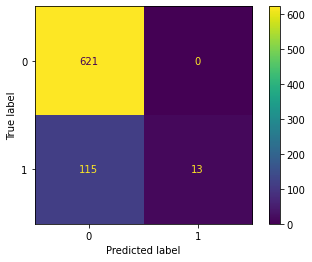

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size= 0.8, random_state=42)
regression.fit(X_train1, y_train1)
y_pred1 = regression.predict(X_test1)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(classification_report(y_test,y_pred))

In [ ]:
# FO


winning_teams = norm_df[norm_df['WIN%'] >= win_rate1]

#This is the selected data
data_features = ['Team', 'Season', 'WIN%', 'W/L', 'FG%', '+/-', 'PTS',   'REB', 'STL', 'BLK']
selected_data = winning_teams[data_features]

# Sorting the data by season
selected_data = selected_data.sort_values('Season')
selected_data = selected_data.reset_index(drop=True)
# Predicting winners of matchups
predicted_winner_teamname = None
predicted_winner_season = None

# Iterate over pairs of teams
for i, team1 in selected_data.iterrows():
    for j, team2 in selected_data.iterrows():
        
        # Skip the same team matchups
        if i == j:
            continue

        # Concatenate features of both teams
        matchup_features = pd.concat([team1[['WIN%', 'FG%', 'PTS', 'REB', 'STL', 'BLK', '+/-']],
                                      team2[['WIN%', 'FG%', 'PTS', 'REB', 'STL', 'BLK', '+/-']]], axis=1)


        # Reshape the input for prediction
        matchup_features = matchup_features.transpose()
    


        # Predict the winner based on the results of the combined features
        winner_index = reg.predict(matchup_features)[0]


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [ ]:

        # Display the results
        if winner_index == 0:
            predicted_winner_teamname = team1['Team']
            predicted_winner_season = team1['Season']
        else:
            predicted_winner_teamname = team2['Team']
            predicted_winner_season = team2['Season']

        print("Matchup:")
        print("Team 1:", team1['Team'], "(", team1['Season'], ")")
        print("Team 2:", team2['Team'], "(", team2['Season'], ")")
        print("Predicted Winner:", predicted_winner_teamname, "(", predicted_winner_season, ")")
        print()


In [ ]:
# Create an empty dictionary
wins_count = {}
predicted_winners_info = {}

for i, team1 in selected_data.iterrows():
    for j, team2 in selected_data.iterrows():
        if i == j:
            continue

        matchup_features = pd.concat([team1[['WIN%', 'FG%', 'PTS', 'REB', 'STL', 'BLK', '+/-']],
                                      team2[['WIN%', 'FG%', 'PTS', 'REB', 'STL', 'BLK', '+/-']]], axis=1)

        matchup_features = matchup_features.transpose()

        winner_index = model.predict(matchup_features)[0]

        if winner_index == 0:
            predicted_winner_teamname = team1['Team']
            predicted_winner_season = team1['Season']
        else:
            predicted_winner_teamname = team2['Team']
            predicted_winner_season = team2['Season']

        # Store the name and season of the predicted winner
        predicted_winners_info[predicted_winner_teamname] = predicted_winner_season

        # Increment the number of wins for the predicted winner
        if predicted_winner_teamname in wins_count:
            wins_count[predicted_winner_teamname] += 1
        else:
            wins_count[predicted_winner_teamname] = 1

# Get the team with the most wins in the matchups
most_wins_winner = max(wins_count, key=wins_count.get)
most_wins_count = wins_count[most_wins_winner]

most_wins_winner_season = predicted_winners_info[most_wins_winner]

# Print the results
print("The team with the Most Wins:", most_wins_winner, "(", most_wins_winner_season, ")")
print("They won", most_wins_count, "games")